# Atos Codex - Data Scientist Workbench
### Explore the CBS Crime and Demographics Dataset
First check some of the environment specs and see what we have here

In [180]:
%%bash
cat /proc/cpuinfo | grep 'processor\|model name'

processor	: 0
model name	: Intel(R) Xeon(R) CPU           E5620  @ 2.40GHz
processor	: 1
model name	: Intel(R) Xeon(R) CPU           E5620  @ 2.40GHz
processor	: 2
model name	: Intel(R) Xeon(R) CPU           E5620  @ 2.40GHz
processor	: 3
model name	: Intel(R) Xeon(R) CPU           E5620  @ 2.40GHz


In [179]:
%%bash
free -g

              total        used        free      shared  buff/cache   available
Mem:             15           6           3           0           5           8
Swap:             0           0           0


### Import Python packages

In [52]:
from __future__ import print_function
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, Text
from IPython.display import display
import numpy as np

### Set Jupyter Notebook graphical parameters

In [4]:
# use the notebook definition for interactive embedded graphics
# %matplotlib notebook

# use the inline definition for static embedded graphics
%matplotlib inline 

rcParam = {
    'figure.figsize': (12,6),
    'font.weight': 'bold',
    'axes.labelsize': 20.0,
    'axes.titlesize': 20.0,
    'axes.titleweight': 'bold',
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
}

for key in rcParam:
    mpl.rcParams[key] = rcParam[key]

### Read the combines CBS dataset
This is the file that we downladen & merged using Talend Open Studio for Big Data. (Note: please check the file path)

In [6]:
cbs_data = pd.read_csv('combined_data.csv',sep=',',na_values=['NA','.'],error_bad_lines=False);

Let's inspect the contents of this file by looking at the first 5 rows.

As you can see, this file has a lot of columns. For a description of the fieldnames, please see the description file

In [7]:
cbs_data.head()

,Regiocode,Regionaam,Inwoners,Vermogen_Vernielingen_en_Geweld,Vermogensmisdrijven,Diefstal,Fietsendiefstal,Diefstal_overige_vervoersmiddelen,Diefstal_uit_vanaf_vervoersmiddelen,Zakkenrollerij_Straatroof_Beroving,...,AV50ATTRAC,AF_PODIUM,AV5_PODIUM,AV10PODIUM,AV20PODIUM,AF_POP,OPP_TOT,OPP_LAND,OPP_WATER,id
0,BU00030000,Appingedam-Centrum,2410,177,101,96,39,2,6,4,...,11.0,5.3,0.1,1.0,1.0,24.5,90,84,5,0
1,BU00030001,Appingedam-West,3160,88,38,31,2,2,3,0,...,11.7,6.3,0.0,1.0,1.0,23.7,163,158,5,1
2,BU00030002,Appingedam-Oost,5860,211,121,116,27,6,14,2,...,11.0,5.1,0.4,1.0,1.0,25.1,295,284,11,2
3,BU00030007,Verspr. huizen Damsterdiep en Eemskanaal,360,14,12,11,2,1,0,0,...,11.6,7.0,0.0,1.0,1.0,23.7,559,540,19,3
4,BU00030008,Verspr. huizen ten zuiden van Eemskanaal,95,10,2,2,1,0,0,0,...,13.5,7.7,0.0,1.0,1.1,22.9,582,554,28,4


In [8]:
cbs_data_2015 = cbs_data.loc[cbs_data['YEAR'] == 2015];
#list(cbs_data_2015)

We will subset the entire 2010-2015 into just the year 2015.

In the table below you will see summary statistics

In [182]:
cbs_data_2015.describe()
#cbs_data_2015.YEAR.describe()

,Inwoners,Vermogen_Vernielingen_en_Geweld,Vermogensmisdrijven,Diefstal,Fietsendiefstal,Diefstal_overige_vervoersmiddelen,Diefstal_uit_vanaf_vervoersmiddelen,Zakkenrollerij_Straatroof_Beroving,Woninginbraak_incl_schuur_tuin,Diefstal_inbraak_niet_residentiele_gebouwen,...,AV50ATTRAC,AF_PODIUM,AV5_PODIUM,AV10PODIUM,AV20PODIUM,AF_POP,OPP_TOT,OPP_LAND,OPP_WATER,id
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,...,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,2808.629355,103.882353,74.540263,65.772701,13.794118,4.416048,12.323529,2.459737,12.900343,8.300114,...,25.731810,5.505397,1.295060,3.633067,11.621074,12.220160,127.193604,121.849800,5.332096,6053.459737
std,2197.816441,131.950154,101.114718,93.461735,28.204311,7.148261,17.676344,9.995283,15.971073,19.342237,...,9.454629,4.867955,1.944618,4.824405,11.474965,8.921645,199.973329,190.713978,25.065847,3342.892412
min,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.300000,0.000000,0.000000,0.000000,0.300000,4.000000,4.000000,0.000000,0.000000
25%,1340.000000,33.000000,23.000000,19.000000,2.000000,1.000000,3.000000,0.000000,4.000000,1.000000,...,19.000000,1.800000,0.000000,1.000000,4.400000,5.200000,38.000000,37.000000,0.000000,3186.250000
50%,2190.000000,65.000000,45.000000,38.000000,5.000000,2.000000,7.000000,0.000000,9.000000,3.000000,...,25.000000,4.100000,1.000000,2.000000,8.000000,10.250000,72.500000,70.000000,0.000000,6103.500000
75%,3595.000000,126.000000,89.000000,77.000000,14.000000,5.000000,15.000000,2.000000,16.000000,8.000000,...,32.000000,7.800000,2.000000,4.500000,14.000000,17.300000,136.000000,132.000000,3.000000,8883.750000
max,26755.000000,2529.000000,2031.000000,1934.000000,661.000000,113.000000,204.000000,306.000000,242.000000,352.000000,...,49.000000,56.200000,33.200000,48.000000,63.000000,60.600000,3160.000000,3106.000000,852.000000,12000.000000


In [14]:
cbs_data_2015 = cbs_data_2015.dropna();
cbs_data_2015.describe()

,Inwoners,Vermogen_Vernielingen_en_Geweld,Vermogensmisdrijven,Diefstal,Fietsendiefstal,Diefstal_overige_vervoersmiddelen,Diefstal_uit_vanaf_vervoersmiddelen,Zakkenrollerij_Straatroof_Beroving,Woninginbraak_incl_schuur_tuin,Diefstal_inbraak_niet_residentiele_gebouwen,...,AV50ATTRAC,AF_PODIUM,AV5_PODIUM,AV10PODIUM,AV20PODIUM,AF_POP,OPP_TOT,OPP_LAND,OPP_WATER,id
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,...,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,2808.629355,103.882353,74.540263,65.772701,13.794118,4.416048,12.323529,2.459737,12.900343,8.300114,...,25.731810,5.505397,1.295060,3.633067,11.621074,12.220160,127.193604,121.849800,5.332096,6053.459737
std,2197.816441,131.950154,101.114718,93.461735,28.204311,7.148261,17.676344,9.995283,15.971073,19.342237,...,9.454629,4.867955,1.944618,4.824405,11.474965,8.921645,199.973329,190.713978,25.065847,3342.892412
min,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.300000,0.000000,0.000000,0.000000,0.300000,4.000000,4.000000,0.000000,0.000000
25%,1340.000000,33.000000,23.000000,19.000000,2.000000,1.000000,3.000000,0.000000,4.000000,1.000000,...,19.000000,1.800000,0.000000,1.000000,4.400000,5.200000,38.000000,37.000000,0.000000,3186.250000
50%,2190.000000,65.000000,45.000000,38.000000,5.000000,2.000000,7.000000,0.000000,9.000000,3.000000,...,25.000000,4.100000,1.000000,2.000000,8.000000,10.250000,72.500000,70.000000,0.000000,6103.500000
75%,3595.000000,126.000000,89.000000,77.000000,14.000000,5.000000,15.000000,2.000000,16.000000,8.000000,...,32.000000,7.800000,2.000000,4.500000,14.000000,17.300000,136.000000,132.000000,3.000000,8883.750000
max,26755.000000,2529.000000,2031.000000,1934.000000,661.000000,113.000000,204.000000,306.000000,242.000000,352.000000,...,49.000000,56.200000,33.200000,48.000000,63.000000,60.600000,3160.000000,3106.000000,852.000000,12000.000000


Description of some of the demographic features of this dataset

In [15]:
cbs_data_2015.iloc[:,35:216].describe()

,POSTCODE,DEK_PERC,OAD,STED,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,P_15_24_JR,P_25_44_JR,...,AV50ATTRAC,AF_PODIUM,AV5_PODIUM,AV10PODIUM,AV20PODIUM,AF_POP,OPP_TOT,OPP_LAND,OPP_WATER,id
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,...,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,5091.974586,1.199315,1276.281839,3.191319,2809.084809,1383.221017,1424.384637,16.961736,11.333524,23.747287,...,25.731810,5.505397,1.295060,3.633067,11.621074,12.220160,127.193604,121.849800,5.332096,6053.459737
std,2390.316317,0.732967,837.932645,1.251542,2189.350731,1072.449722,1119.185300,4.576896,3.028968,5.674533,...,9.454629,4.867955,1.944618,4.824405,11.474965,8.921645,199.973329,190.713978,25.065847,3342.892412
min,1023.000000,1.000000,31.000000,1.000000,260.000000,130.000000,130.000000,2.000000,3.000000,7.000000,...,0.500000,0.300000,0.000000,0.000000,0.000000,0.300000,4.000000,4.000000,0.000000,0.000000
25%,3062.500000,1.000000,641.000000,2.000000,1345.000000,655.000000,680.000000,14.000000,10.000000,20.000000,...,19.000000,1.800000,0.000000,1.000000,4.400000,5.200000,38.000000,37.000000,0.000000,3186.250000
50%,5171.000000,1.000000,1160.000000,3.000000,2205.000000,1080.000000,1115.000000,17.000000,11.000000,23.000000,...,25.000000,4.100000,1.000000,2.000000,8.000000,10.250000,72.500000,70.000000,0.000000,6103.500000
75%,6968.500000,1.000000,1736.250000,4.000000,3595.000000,1763.750000,1823.750000,19.000000,12.000000,26.000000,...,32.000000,7.800000,2.000000,4.500000,14.000000,17.300000,136.000000,132.000000,3.000000,8883.750000
max,9991.000000,6.000000,5820.000000,5.000000,26535.000000,13200.000000,13500.000000,42.000000,49.000000,50.000000,...,49.000000,56.200000,33.200000,48.000000,63.000000,60.600000,3160.000000,3106.000000,852.000000,12000.000000


We want to make a label and a set of features out of our data

Labelling: The relative amount of money and property crimes ( Vermogensmisdrijven_rel)

Features : All neighbourhood demographic columns in the dataset

In [156]:
labels = cbs_data_2015["Vermogensmisdrijven_rel"].values
columns = list(cbs_data_2015.iloc[:,37:215])

In [157]:
features = cbs_data_2015[list(columns)];
features = features.apply(lambda columns : pd.to_numeric(columns, errors='ignore'))

Inspect our labels and features

In [158]:
print(labels[1:10])
features.head()

[  10.   18.   10.    8.   10.    9.  110.   29.   17.]


,OAD,STED,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,P_15_24_JR,P_25_44_JR,P_45_64_JR,P_65_EO_JR,...,AV20ATTRAC,AV50ATTRAC,AF_PODIUM,AV5_PODIUM,AV10PODIUM,AV20PODIUM,AF_POP,OPP_TOT,OPP_LAND,OPP_WATER
55982,1106.0,3.0,2315,1075,1235,10.0,10.0,20.0,29.0,31.0,...,1.0,11.0,5.3,0.1,1.0,1.0,24.5,90,84,5
55983,834.0,4.0,3175,1570,1600,18.0,10.0,21.0,33.0,18.0,...,1.0,11.7,6.3,0.0,1.0,1.0,23.7,163,158,5
55984,1040.0,3.0,5965,2880,3085,16.0,11.0,23.0,27.0,23.0,...,1.0,11.0,5.1,0.4,1.0,1.0,25.1,295,284,11
55988,746.0,4.0,7800,3870,3930,17.0,12.0,21.0,30.0,20.0,...,2.5,18.9,9.9,0.0,1.0,6.0,9.9,313,308,5
55996,163.0,5.0,2170,1075,1095,16.0,9.0,22.0,29.0,23.0,...,0.0,11.3,12.1,0.0,0.0,1.0,48.1,451,445,6


### Feature selection using Randomized Lasso
Import Randomized Lasso from the Python Scikit-learn package

In [159]:
from sklearn.linear_model import RandomizedLasso

Run Randomized Lasso, with 3000 resampling and 100 iterations.

In [160]:
rlasso = RandomizedLasso(alpha='aic',verbose =True,normalize =True,n_resampling=3000,max_iter=100)
rlasso.fit(features, labels)

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  8.1min finished


RandomizedLasso(alpha='aic', eps=2.2204460492503131e-16, fit_intercept=True,
        max_iter=100, memory=Memory(cachedir=None), n_jobs=1,
        n_resampling=3000, normalize=True, pre_dispatch='3*n_jobs',
        precompute='auto', random_state=None, sample_fraction=0.75,
        scaling=0.5, selection_threshold=0.25, verbose=True)

### Features sorted by their score
In the table below the top10 best features (i.e. columns) are shown with their score

In [189]:
dfResults = pd.DataFrame.from_dict(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), list(features)), reverse=True))
dfResults.columns = ['Score', 'FeatureName']
dfResults.head(10)

,Score,FeatureName
0,1.0000,A_BED_GI
1,1.0000,AV1_CAFTAR
2,0.9997,AF_TREINST
3,0.9970,AF_ZIEK_E
4,0.9957,G_ELEK_HOE
5,0.9940,P_HUKO_ONB
6,0.9937,P_00_14_JR
7,0.9840,G_GAS_HOEK
8,0.9823,G_GAS_KO
9,0.9813,BEV_DICHTH


Because in the beginning of the lasso results table, a lot of high-scoring features are present, we want 
to check how the scores are devided across all features

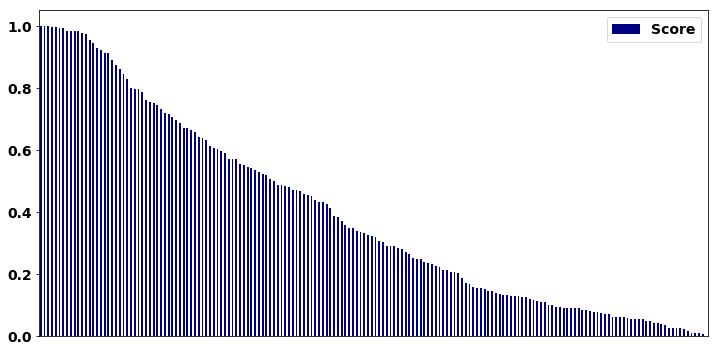

In [186]:
dfResults.plot('FeatureName', 'Score', kind='bar', color='navy')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()

### Scatterplot
Let's inspect one of the top variables and make a scatterplot for this one

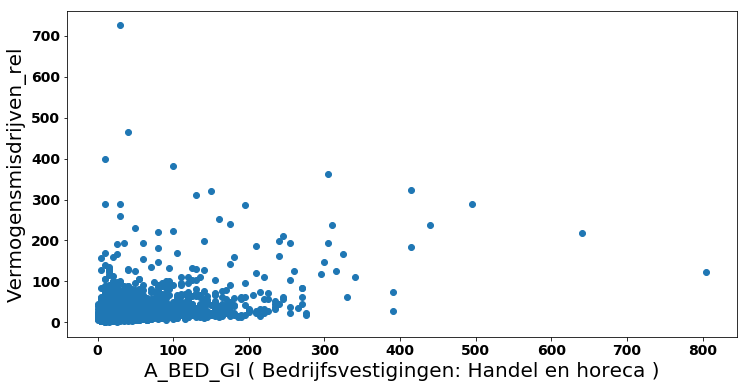

In [170]:
plt.scatter(y=pd.to_numeric(cbs_data_2015['Vermogensmisdrijven_rel']),x=pd.to_numeric(cbs_data_2015['A_BED_GI']));
plt.ylabel('Vermogensmisdrijven_rel')
plt.xlabel('A_BED_GI ( Bedrijfsvestigingen: Handel en horeca )')
plt.show()

In [188]:
dfResults.tail(10)

,Score,FeatureName
168,0.0283,AF_DAGLMD
169,0.0270,AV5_ONDVRT
170,0.0260,AANT_INK
171,0.0233,P_LAAGINKH
172,0.0173,AV20WARENH
173,0.0120,AUTO_TOT
174,0.0117,AANT_MAN
175,0.0093,A_BEDV
176,0.0063,AANT_VROUW
177,0.0003,AANT_INW


Let's also inspect one of the worst variables (Perc% of Low income households) and plot this one too

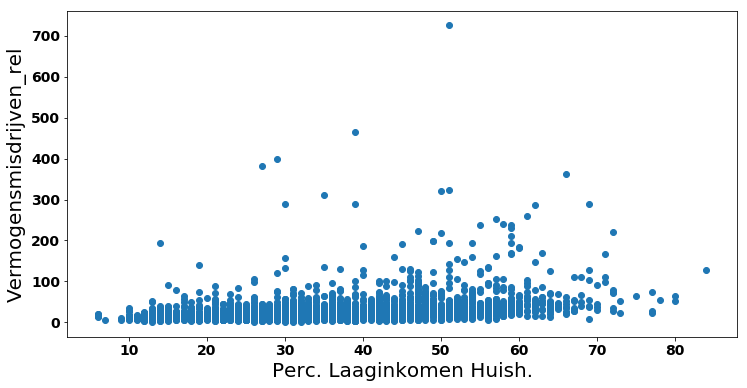

In [183]:
plt.scatter(y=pd.to_numeric(cbs_data_2015['Vermogensmisdrijven_rel']),x=pd.to_numeric(cbs_data_2015['P_LAAGINKH']));
plt.ylabel('Vermogensmisdrijven_rel')
plt.xlabel('Perc. Laaginkomen Huish.')
plt.show()

Try-out another hypothese (e.g. Perc% of divorced vs. Rel% Domestic and Sexual violence crimes)

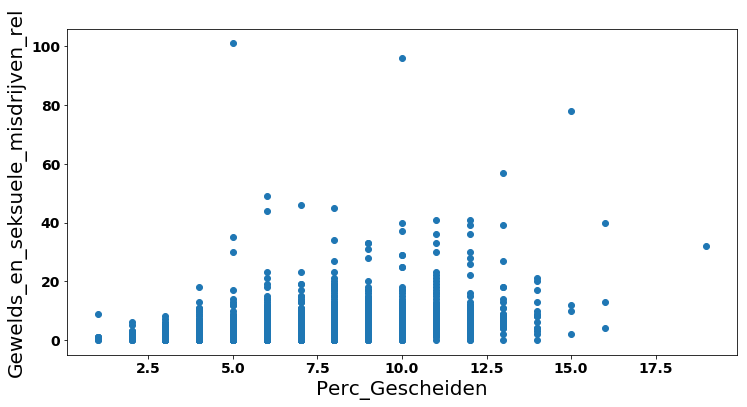

In [184]:
plt.scatter(y=pd.to_numeric(cbs_data_2015['Gewelds_en_seksuele_misdrijven_rel']),x=pd.to_numeric(cbs_data_2015['P_GESCHEID']));
plt.ylabel('Gewelds_en_seksuele_misdrijven_rel')
plt.xlabel('Perc_Gescheiden')
plt.show()